In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('user-events.csv')

In [3]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
6,2020-09-24 11:58:23 UTC,view,3791349,2144415935086199225,computers.desktop,NaN,215.41,1515915625519388877,J1t6sIYXiV
7,2020-09-24 11:58:24 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
8,2020-09-24 11:58:25 UTC,view,657859,2144415939431498289,NaN,NaN,34.17,1515915625519320570,HEl15U7JVy
9,2020-09-24 11:58:31 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
# check detail and info of data
desc = df.describe().T
desc['skewness'] = df.skew()
desc['miss_values'] = df.isnull().sum()
desc['Unique_values'] = [df[i].nunique() for i in ['product_id', 'category_id', 'price', 'user_id']]
desc['type'] =  df.dtypes
desc

,count,mean,std,min,25%,50%,75%,max,skewness,miss_values,Unique_values,type
product_id,885129.0,1.906621e+06,1.458708e+06,1.020000e+02,6.988030e+05,1.452883e+06,3.721194e+06,4.183880e+06,0.480662,0,53453,int64
category_id,885129.0,2.144423e+18,6.165105e+14,2.144416e+18,2.144416e+18,2.144416e+18,2.144416e+18,2.227847e+18,121.836697,0,718,int64
price,885129.0,1.463287e+02,2.968077e+02,2.200000e-01,2.646000e+01,6.571000e+01,1.904900e+02,6.477106e+04,73.284999,0,12422,float64
user_id,885129.0,1.515916e+18,3.554165e+07,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18,-1.009892,0,407283,int64


In [6]:
cat = []
for i in range(500):
    if df.category_code.isnull()[i] == True:
        pass
    else:
        cat.append(df.category_code[i])

In [7]:
cat_list = [str(df.category_code[i]).split('.') for i in range(df.shape[0])]
for i in range(len(cat_list)):
    if len(cat_list[i]) == 2:
        cat_list[i].insert(1, 'nan')
    elif len(cat_list[i]) == 1:
        cat_list[i].insert(1, 'nan')
        cat_list[i].insert(2, 'nan')
    else:
        pass
main_cat = [cat_list[i][0] for i in range(len(cat_list))]
sub_cat = [cat_list[i][1] for i in range(len(cat_list))]
product = [cat_list[i][2] for i in range(len(cat_list))]

In [26]:
df_new = df.copy()
df_new['main_category'] = main_cat
df_new['sub_category'] = sub_cat
df_new['product'] = product
df_new["main_category"].mask(df_new["main_category"] == 'nan', np.nan, inplace=True);
df_new["sub_category"].mask(df_new["sub_category"] == 'nan', np.nan, inplace=True);
df_new["product"].mask(df_new["product"] == 'nan', np.nan, inplace=True);

In [9]:
df_new.sample(8)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,sub_category,product
606494,2021-01-14 09:04:28 UTC,view,3550606,2144415922427789416,computers.components.videocards,asus,509.54,1515915625592978691,R1OV0EwrXZ,computers,components,videocards
583676,2021-01-10 21:44:29 UTC,view,1843377,2144415926554984657,construction.tools.drill,felisatti,96.70,1515915625591670641,MH1KG69r8N,construction,tools,drill
284516,2020-11-15 12:14:49 UTC,view,564712,2144415935631458761,construction.tools.soldering,NaN,24.92,1515915625539646377,YTETC3dCNi,construction,tools,soldering
168275,2020-10-28 10:45:23 UTC,view,886210,2144415922872385653,electronics.tablet,huawei,215.24,1515915625531479433,YD4uTLm75l,electronics,NaN,tablet
733607,2021-02-03 10:51:18 UTC,view,802811,2144415925011480748,stationery.cartrige,NaN,42.98,1515915625528265397,9JY8BWgARb,stationery,NaN,cartrige
566023,2021-01-08 06:03:55 UTC,view,3829572,2144415924021624977,electronics.tablet,samsung,57.62,1515915625574129236,AaEpZPCFNp,electronics,NaN,tablet
279380,2020-11-14 15:18:57 UTC,view,3738038,2144415937552450047,NaN,lyambda,27.97,1515915625539341860,p0XRZEYjXQ,NaN,NaN,NaN
6570,2020-09-26 01:37:12 UTC,view,1667762,2144415927049912542,electronics.video.tv,jvc,160.52,1515915625519858338,rNEtsQh1eA,electronics,video,tv


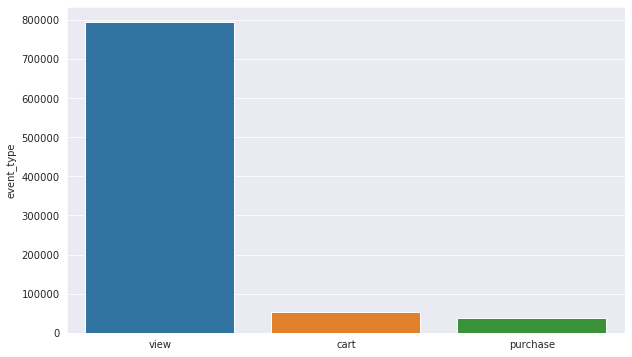

In [10]:
with sns.axes_style("darkgrid"):   
    plt.figure(figsize=(10,6))
    sns.barplot(x=df_new.event_type.value_counts().index, y=df_new.event_type.value_counts());

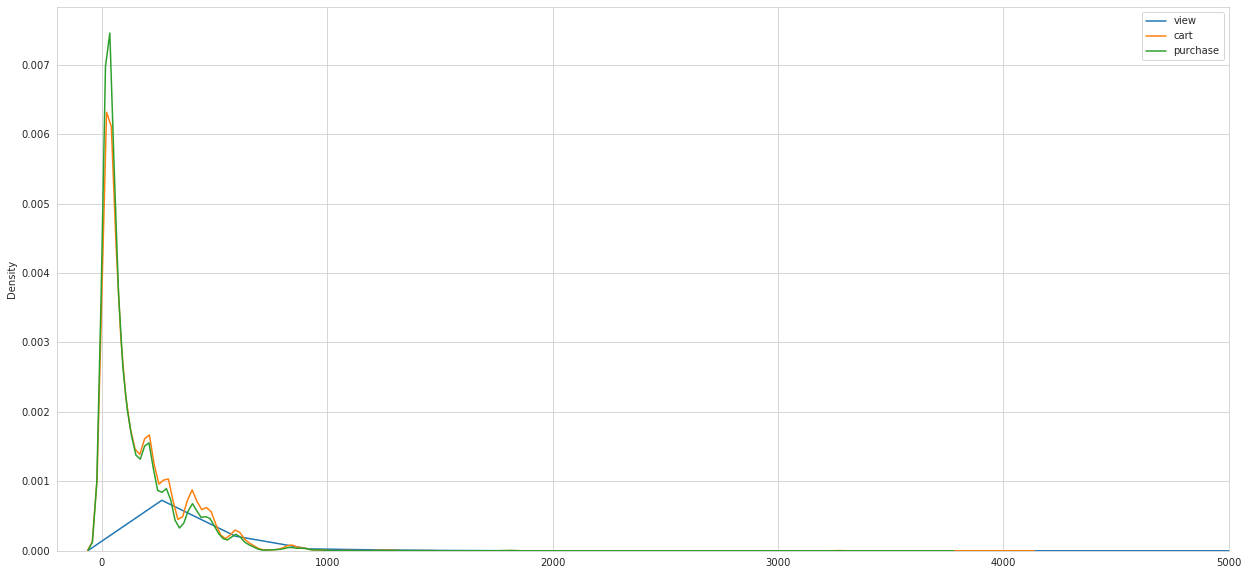

In [11]:
target_0 = df_new.loc[df_new['event_type'] == 'view']
target_1 = df_new.loc[df_new['event_type'] == 'cart']
target_2 = df_new.loc[df_new['event_type'] == 'purchase']

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(21,10))
    sns.distplot(target_0[['price']], hist=False)
    sns.distplot(target_1[['price']], hist=False)
    sns.distplot(target_2[['price']], hist=False)
    plt.legend(['view', 'cart', 'purchase'])

    plt.xlim([-200,5000])

## Kategori dan Produk

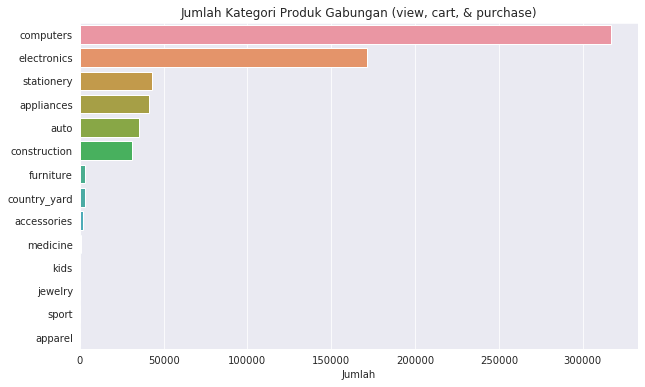

In [12]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    sns.barplot(y=df_new.main_category.value_counts().index, x=df_new.main_category.value_counts());
    plt.xlabel('Jumlah')
    plt.title('Jumlah Kategori Produk Gabungan (view, cart, & purchase)')

<Figure size 1728x1080 with 0 Axes>

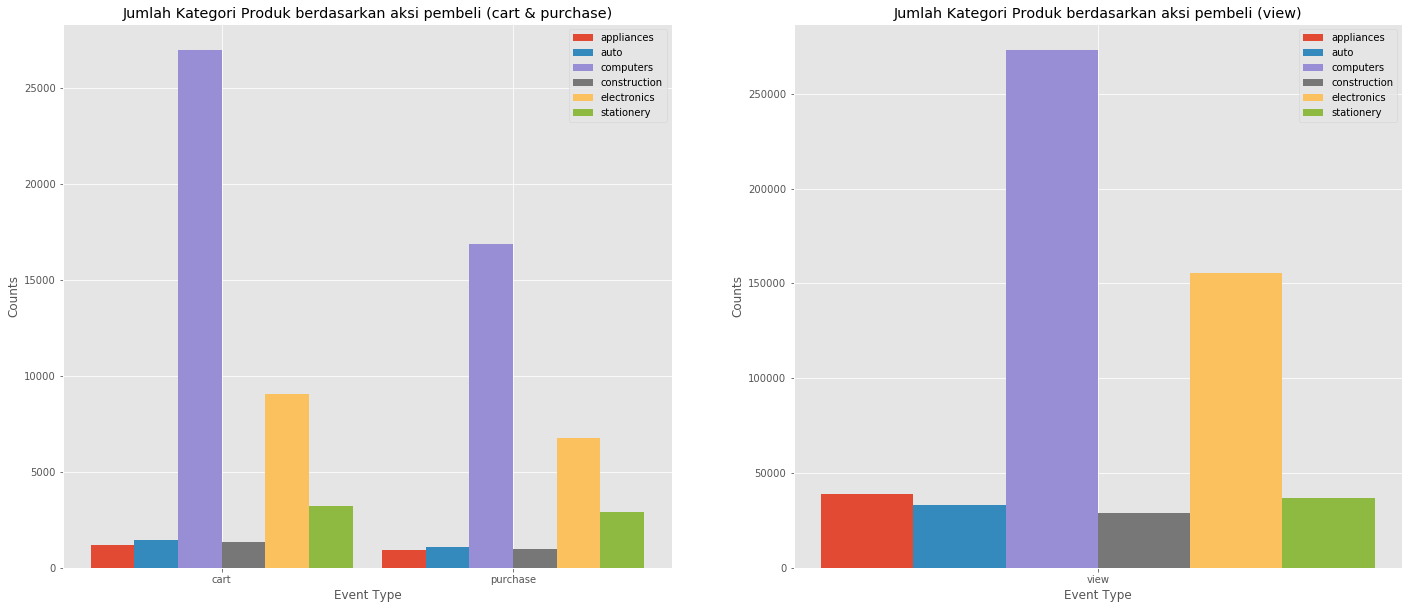

In [14]:
col = ['computers','electronics','stationery','appliances','auto','construction']
df_new2 = df_new[df_new.event_type.isin(['view', 'purchase', 'cart'])]
df_new2 = df_new2[df_new2.main_category.isin(col)].groupby(['event_type', 'main_category']).size().unstack()
df_new2 = pd.DataFrame(df_new2).reset_index()
with plt.style.context('ggplot'):
    plt.figure(figsize=(24,15))
    ind = np.arange(2)
    w = 0.15
    df_new22 = df_new2.copy()
    df_new2 = df_new2[df_new2.event_type.isin(['purchase', 'cart'])]
    fig, ax = plt.subplots(1,2, figsize=(24,10))
    for i in range(6):
        ax[0].bar(ind+w*i, df_new2[df_new2.columns[i+1]], w, label=df_new2.columns[i+1])
    ax[0].set_xlabel('Event Type'); ax[0].set_ylabel('Counts'); ax[0].set_xticks(ticks = ind + 5*w / 2); ax[0].set_xticklabels(df_new2.event_type)
    ax[0].set_title('Jumlah Kategori Produk berdasarkan aksi pembeli (cart & purchase)'); ax[0].legend(loc='best')

    ind = np.arange(1)
    df_new22 = df_new22[df_new22.event_type.isin(['view'])]
    for i in range(6):
        ax[1].bar(ind+w*i, df_new22[df_new22.columns[i+1]], w, label=df_new22.columns[i+1])
    ax[1].set_xlabel('Event Type'); ax[1].set_ylabel('Counts'); ax[1].set_xticks(ticks = ind + 5*w / 2); ax[1].set_xticklabels(df_new22.event_type)
    ax[1].set_title('Jumlah Kategori Produk berdasarkan aksi pembeli (view)'); ax[1].legend(loc='best')

In [39]:
def pie_six(event, subject, judul, n):
    with plt.style.context('ggplot'):
        fig, ax = plt.subplots(2,3, figsize=(24,12))
        ax = ax.flatten()
        df_new_purchase = df_new[df_new.event_type==event]
        fig.tight_layout(); fig.subplots_adjust(top=0.9); fig.suptitle(judul, size=30)
        for i,j in enumerate(col):
            top_n = df_new_purchase[df_new_purchase.main_category==j][subject].value_counts()[0:n]
            others = df_new_purchase[df_new_purchase.main_category==j][subject].value_counts()[n:].sum()
            label = list(top_n.index); label.append('others'); count = list(top_n.values); count.append(others)
            ax[i].pie(count, labels = label, autopct='%.0f%%')
            ax[i].set_title(j);

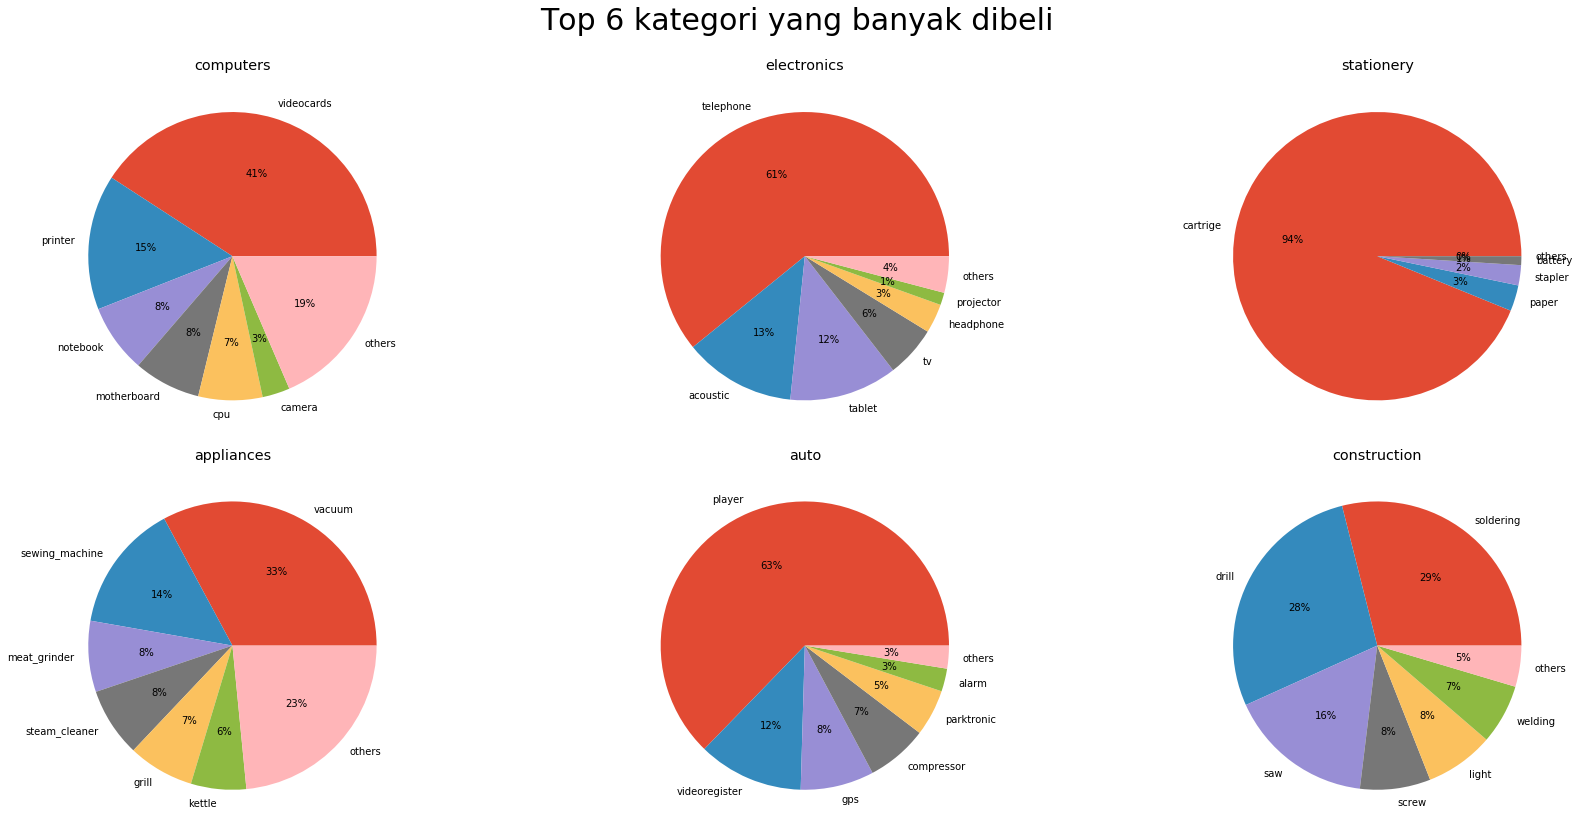

In [40]:
pie_six(event='purchase', subject='product', judul='Top 6 kategori yang banyak dibeli', n=6)

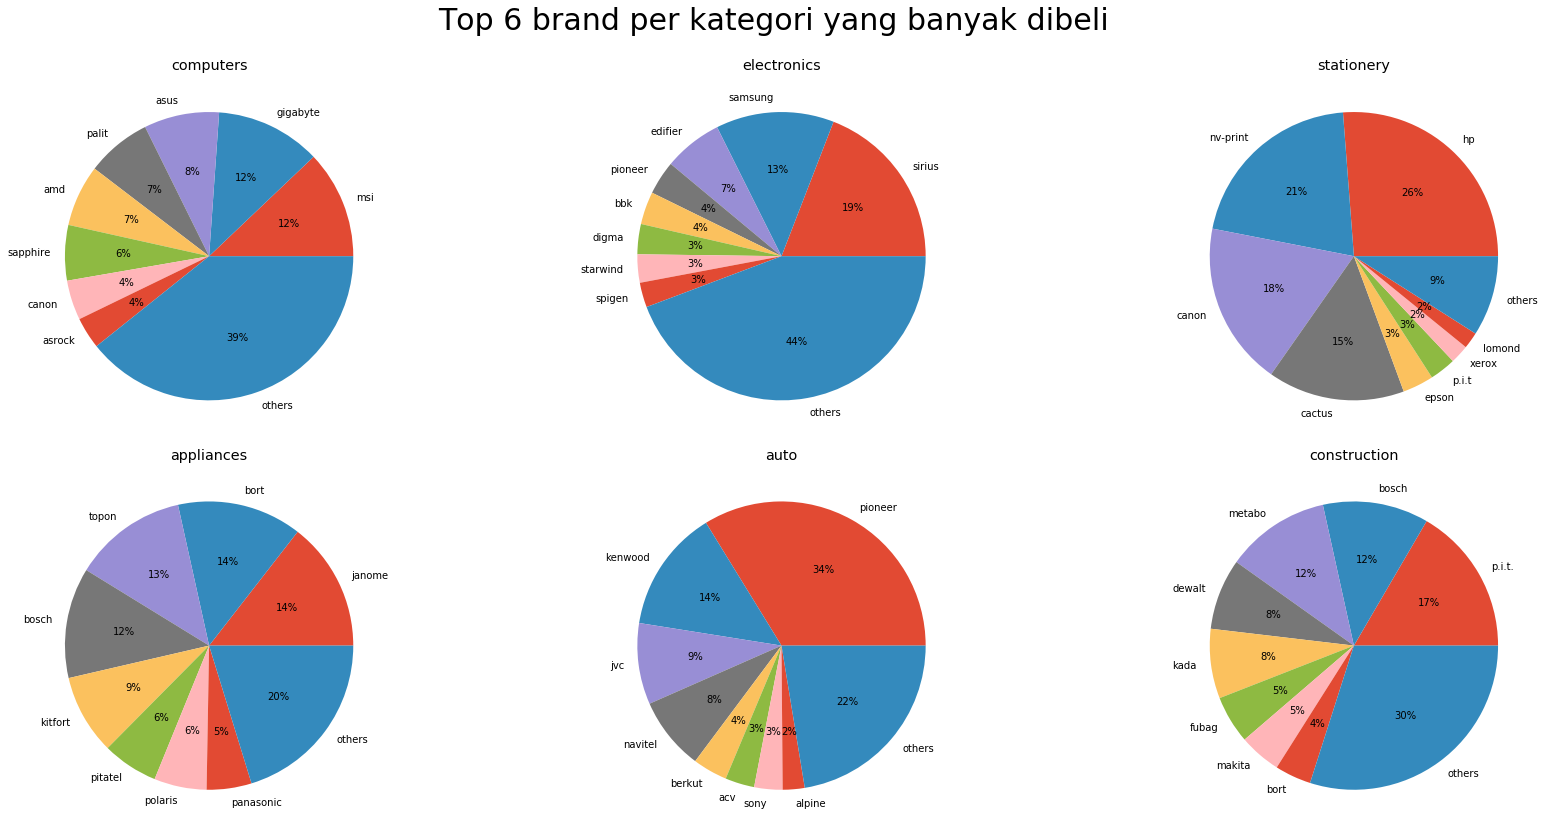

In [42]:
pie_six(event='purchase', subject='brand', judul='Top 8 brand per kategori yang banyak dibeli', n=8)

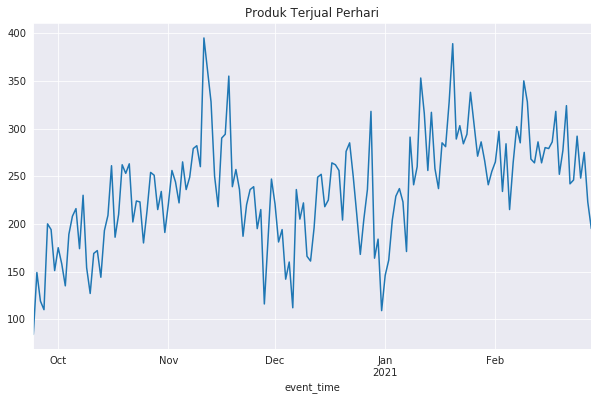

In [96]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    df_new[df_new.event_type=='purchase'].groupby(pd.Grouper(key='event_time', freq='D'))['product_id'].count().plot.line()
    plt.title('Produk Terjual Perhari')